In [7]:
#DFS CODE
def get_graph_from_user():
    graph = {}
    n = int(input("Enter the number of Nodes: "))

    for _ in range(n):
        node = input("Enter the node name: ")
        neighbors = input(f"Enter the neighbors of {node} (comma-separated): ").split(",")
        neighbors = [neighbor.strip() for neighbor in neighbors] 
        graph[node] = neighbors
    return graph

def DFS(graph,start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            print(f"{node}",end="->")
            stack.extend(reversed(graph.get(node,[])))


graph = get_graph_from_user()
print("\nGraph:", graph)


start_node = input("Enter the starting node: ")  
DFS(graph, start_node)





Graph: {'A': ['B', 'C'], 'B': ['A', 'C', 'D'], 'C': ['A', 'B', 'E'], 'D': ['B', 'E'], 'E': ['C', 'D']}
A->B->C->E->D->

In [2]:
#DFS WITH ALL PATH FROM THE STARING NODE
def get_graph_from_user():
    graph = {}
    n = int(input("Enter the number of Nodes: "))

    for _ in range(n):
        node = input("Enter the node name: ")
        neighbors = input(f"Enter the neighbors of {node} (comma-separated): ").split(",")
        neighbors = [neighbor.strip() for neighbor in neighbors if neighbor.strip()]  
        graph[node] = neighbors
    return graph

def DFS_all_paths(graph, start):
    stack = [(start, [start])]  # (node, path)

    while stack:
        node, path = stack.pop()  
        print("->".join(path))  

        for neighbor in graph.get(node, []):
            if neighbor not in path:  # Avoid cycles
                stack.append((neighbor, path + [neighbor]))  


graph = get_graph_from_user()
print("\nGraph:", graph)


start_node = input("Enter the starting node: ")  
print(f"\nAll possible paths from {start_node}:")
DFS_all_paths(graph, start_node)



Graph: {'A': ['B', 'C'], 'B': ['A', 'C', 'D'], 'C': ['A', 'B', 'E'], 'D': ['B', 'E'], 'E': ['C', 'D']}

All possible paths from A:
A
A->C
A->C->E
A->C->E->D
A->C->E->D->B
A->C->B
A->C->B->D
A->C->B->D->E
A->B
A->B->D
A->B->D->E
A->B->D->E->C
A->B->C
A->B->C->E
A->B->C->E->D


In [8]:
#DFS CODE WITH GOAL NODE

def get_graph_from_user():
    graph = {}
    n = int(input("Enter the number of Nodes: "))

    for _ in range(n):
        node = input("Enter the node name: ")
        neighbors = input(f"Enter the neighbors of {node} (comma-separated): ").split(",")
        neighbors = [neighbor.strip() for neighbor in neighbors] 
        graph[node] = neighbors
    return graph


def DFS(graph, start, goal):
    visited = set()
    stack = [(start, [start])]  #  (node, path)

    while stack:
        node, path = stack.pop()  
        
        if node == goal:  
            print("->".join(path))  
            return 
        
        if node not in visited:
            visited.add(node)
            
            for neighbor in reversed(graph.get(node, [])): 
                stack.append((neighbor, path + [neighbor]))  

    print("Path does not exist")  



graph = get_graph_from_user()
print("\nGraph:", graph)


start_node = input("Enter the starting node: ")  
goal_node = input("Enter the goal node: ")
DFS(graph, start_node,goal_node)




Graph: {'A': ['B', 'C'], 'B': ['A', 'C', 'D'], 'C': ['A', 'B', 'E'], 'D': ['B', 'E'], 'E': ['C', 'D']}
A->B->C


In [3]:
#DFS WITH ALL PATH FROM THE STARING NODE AND WITH GOAL NODE

def get_graph_from_user():
    graph = {}
    n = int(input("Enter the number of Nodes: "))

    for _ in range(n):
        node = input("Enter the node name: ")
        neighbors = input(f"Enter the neighbors of {node} (comma-separated): ").split(",")
        neighbors = [neighbor.strip() for neighbor in neighbors if neighbor.strip()]
        graph[node] = neighbors
    return graph

def DFS_all_paths(graph, start, goal):
    stack = [(start, [start])] 
    found = False  # To check if any path exists

    while stack:
        node, path = stack.pop()

        if node == goal:
            print("->".join(path))  
            found = True  
            continue 

        for neighbor in graph.get(node, []):
            if neighbor not in path:  # Avoid cycles
                stack.append((neighbor, path + [neighbor]))

    if not found:
        print("Path does not exist")


graph = get_graph_from_user()
print("\nGraph:", graph)

start_node = input("Enter the starting node: ")  
goal_node = input("Enter the goal node: ")
print(f"\nAll possible paths from {start_node} to {goal_node}:")
DFS_all_paths(graph, start_node, goal_node)



Graph: {'A': ['B', 'C'], 'B': ['A', 'C', 'D'], 'C': ['A', 'B', 'E'], 'D': ['B', 'E'], 'E': ['C', 'D']}

All possible paths from A to D:
A->C->E->D
A->C->B->D
A->B->D
A->B->C->E->D


In [9]:
#UNIFORM COST SEARCH

import heapq
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    # Priority queue to store the frontier nodes, initialized with the start node
    priority_queue = [(0, start)]
    # Dictionary to store the cost of the shortest path to each node
    visited = {start: (0, None)}
   
    while priority_queue:
        # Pop the node with the lowest cost from the priority queue
        current_cost, current_node = heapq.heappop(priority_queue)
       
        # If we reached the goal, return the total cost and the path
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)
       
        # Explore the neighbors
        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            # Check if this path to the neighbor is better than any previously found
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))
   
    # If the goal is not reachable, return None
    return None
def reconstruct_path(visited, start, goal):
    # Reconstruct the path from start to goal by following the visited nodes
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1]  # Get the parent node
    path.reverse()
    return path

graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}

# Example usage of the UCS function
start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
   
else:
    print(f"No path found from {start_node} to {goal_node}")

Least cost path from A to G: A -> B -> D -> G with total cost 4


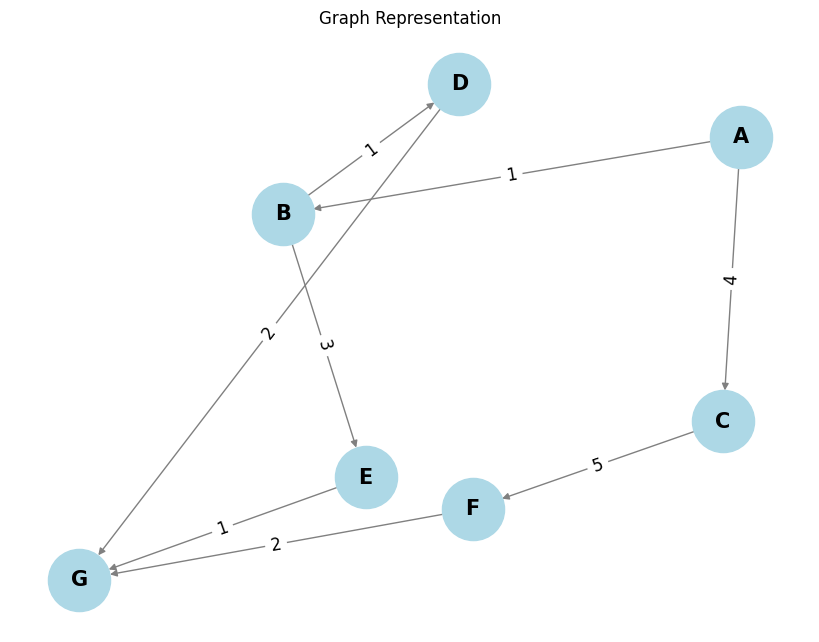

Least cost path from A to G: A -> B -> D -> G with total cost 4


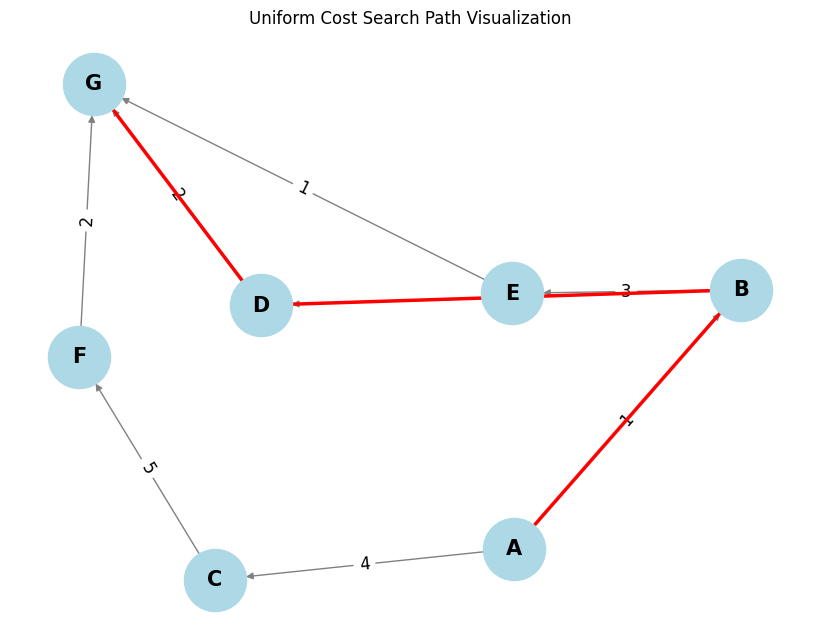

In [1]:
#visualization of UCS 
import networkx as nx
import matplotlib.pyplot as plt

def display_graph(graph):
    """
    Function to display the graph without any path highlighting.
    """
    G = nx.DiGraph()

    # Adding nodes and edges to the graph
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  # Positioning the nodes

    # Drawing the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    plt.title("Graph Representation")
    plt.show()

def display_path(graph, path):
    """
    Function to display the graph with the given path highlighted.
    """
    G = nx.DiGraph()

    # Adding nodes and edges to the graph
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  # Positioning the nodes

    # Drawing the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    # Highlight the path in red
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title("Uniform Cost Search Path Visualization")
    plt.show()

# Example graph represented as an adjacency list
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}

# Example UCS function (replace this with your actual UCS implementation)
def uniform_cost_search(graph, start, goal):
    from queue import PriorityQueue

    pq = PriorityQueue()
    pq.put((0, start, [start]))  # (cost, current_node, path)
    visited = set()

    while not pq.empty():
        cost, node, path = pq.get()
        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return cost, path  # Return the total cost and the path

        for neighbor, edge_cost in graph.get(node, []):
            if neighbor not in visited:
                pq.put((cost + edge_cost, neighbor, path + [neighbor]))

    return None

# Running UCS
start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

# Display graph and path
display_graph(graph)  # Show the base graph

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    display_path(graph, path)  # Highlight the UCS path
else:
    print(f"No path found from {start_node} to {goal_node}")